
En este proyecto voy a buscar la manera de segmentar en distintos grupos los pokemons de mi base de datos. Aplicaré un modelo de KMeans para lograr este objetivo


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram
from matplotlib.pyplot import figure

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer

import sklearn.cluster as sk
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
basic_path = '/content/Pokemon (1).csv'

In [3]:
df = pd.read_csv('/content/Pokemon (1).csv')

In [4]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [5]:
df.shape

(1072, 13)

In [7]:
#Columna type2 tiene muchos valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [8]:
df.isnull()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,False,False,False,True,False,False,False,False,False,False,False,False,False
1068,False,False,False,True,False,False,False,False,False,False,False,False,False
1069,False,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
number,0
name,0
type1,0
type2,498
total,0
hp,0
attack,0
defense,0
sp_attack,0
sp_defense,0


In [10]:
#Los valores nulos de la columna type2 los transformaremos a NoType
df['type2'].fillna('NoType', inplace=True)

<ipython-input-10-0d59bb6b4c7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type2'].fillna('NoType', inplace=True)


In [11]:
df.isnull().sum()

,0
number,0
name,0
type1,0
type2,0
total,0
hp,0
attack,0
defense,0
sp_attack,0
sp_defense,0


Fijamos la variable que vamos a usar como índice.

In [12]:
df.set_index('name', drop=True, inplace=True)

In [13]:
df.head(10)

,number,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Gigantamax Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Charmander,4,Fire,NoType,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NoType,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False


In [14]:
df.shape

(1072, 12)

In [15]:
df['number'].value_counts()

,count
number,
479,6
386,4
800,4
741,4
892,4
...,...
343,1
344,1
345,1


In [16]:
df.drop(columns=['number'],inplace=True)

Observamos cuantos tipos de Pokemons y cuantos Pokemons de cada tipo tenemos.

In [17]:
len(df['type1'].unique())

20

In [18]:
df['type1'].value_counts()

,count
type1,
Water,136
Normal,117
Grass,94
Bug,83
Psychic,80
Fire,67
Electric,63
Rock,60
Dark,48


In [19]:
df['type1'].value_counts(normalize = True)

,proportion
type1,
Water,0.126866
Normal,0.109142
Grass,0.087687
Bug,0.077425
Psychic,0.074627
Fire,0.062500
Electric,0.058769
Rock,0.055970
Dark,0.044776


In [20]:
df.columns.to_list()

['type1',
 'type2',
 'total',
 'hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'generation',
 'legendary']

In [21]:
df[["type1", "total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].groupby('type1').mean().style.format("{:20,.2f}").background_gradient(axis=0, cmap='Blues')

,total,hp,attack,defense,sp_attack,sp_defense,speed
type1,,,,,,,
Blastoise,530.00,79.00,83.00,100.00,85.00,105.00,78.00
Bug,384.75,57.10,70.33,71.52,56.83,65.55,63.42
Dark,439.56,71.31,83.52,67.17,71.56,69.06,76.94
Dragon,536.37,85.24,107.02,83.93,91.73,84.10,84.34
Electric,450.33,62.29,74.95,66.14,89.54,71.48,85.94
Fairy,441.70,72.61,67.74,70.74,80.30,90.57,59.74
Fighting,452.31,74.51,104.73,74.98,57.76,68.22,72.11
Fire,458.58,70.01,86.51,68.28,86.58,71.85,75.34
Flying,446.11,72.78,76.44,68.89,71.56,71.67,84.78


In [22]:
len(df['type2'].unique())

19

In [23]:
df['type2'].value_counts()

,count
type2,
NoType,498
Flying,114
Fairy,44
Psychic,43
Poison,41
Ground,39
Steel,36
Dragon,35
Fighting,32


In [24]:
df['type2'].value_counts(normalize = True)

,proportion
type2,
NoType,0.464552
Flying,0.106343
Fairy,0.041045
Psychic,0.040112
Poison,0.038246
Ground,0.036381
Steel,0.033582
Dragon,0.032649
Fighting,0.029851


In [25]:
df[["type2", "total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]].groupby('type2').mean().style.format("{:20,.2f}").background_gradient(axis=0, cmap='Blues')

,total,hp,attack,defense,sp_attack,sp_defense,speed
type2,,,,,,,
Bug,391.80,61.60,76.50,65.40,63.00,73.90,51.40
Dark,487.68,77.82,110.39,72.82,80.00,69.43,77.21
Dragon,540.86,92.00,94.11,93.14,103.00,82.60,76.00
Electric,437.91,76.18,80.27,85.45,74.27,66.45,55.27
Fairy,444.02,64.57,71.09,75.18,82.82,83.80,66.57
Fighting,521.00,80.12,112.34,83.31,80.25,78.66,86.31
Fire,491.39,76.44,81.28,80.39,97.61,78.17,77.50
Flying,454.61,71.63,80.60,68.83,76.92,71.96,84.89
Ghost,471.58,66.27,89.92,82.04,82.88,80.81,69.65


Eliminare las variables categóricas type1 y type2 ya que quiero segmentar por skills no que se vea sesgado por los tipos. Además porque es más simple ya que si hacemos one hot encoding nos quedarán muchas columnas.

Respecto al 'total', lo más probable es que sea una combinación lineal del resto de las estadísticas, por lo que debiera tener una alta correlación con estas, de todas maneras de momento mantendré la columna total en el modelo.


Primero vamos a quitar las variables categóricas ('type1' y 'type2') ya que nos podrian condicionar mucho los resultados y vamos a dejar la variable 'total' para ver como se comporta el algoritmo.

In [30]:
df

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Glastrier,Ice,NoType,580,100,145,130,65,110,30,8,True
Spectrier,Ghost,NoType,580,100,65,60,145,80,130,8,True
Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True


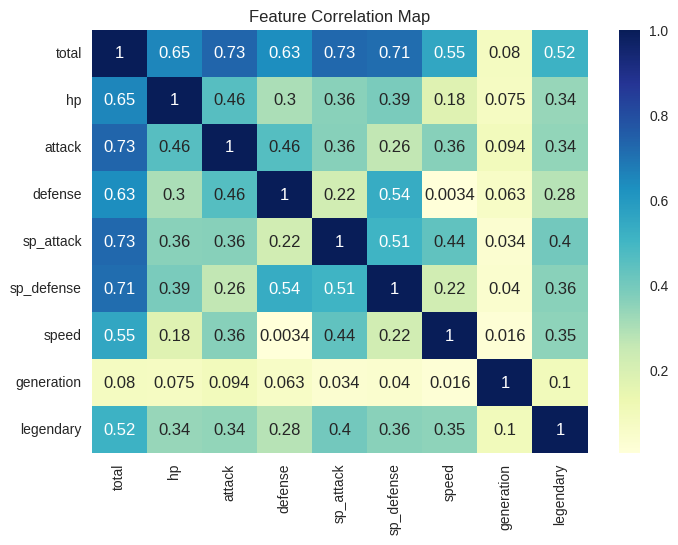

In [31]:
Skills = ["total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "generation", "legendary"]
sns.heatmap(df[Skills].corr(),cmap="YlGnBu", annot=True);
plt.title("Feature Correlation Map");

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


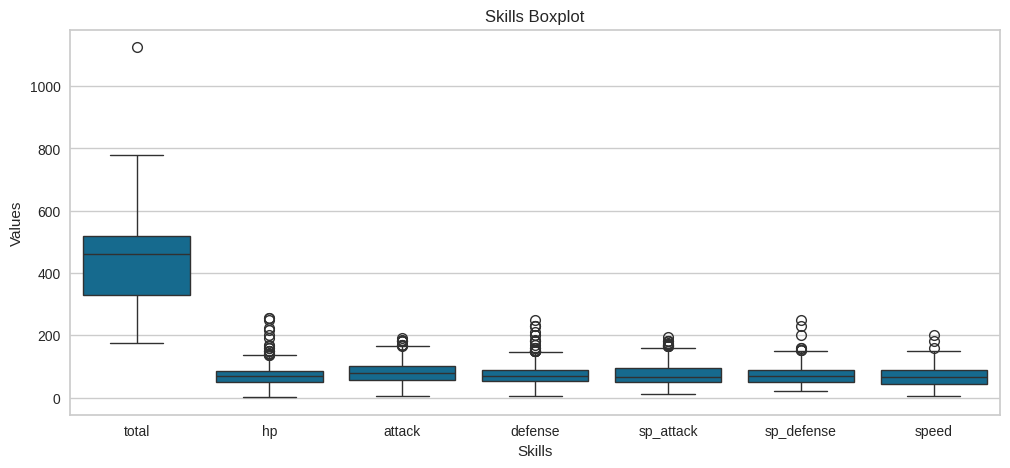

In [32]:
boxplot = pd.melt(df,
                       id_vars = ["type1", "type2", "generation", "legendary"],
                       value_vars = ["total", "hp", "attack", "defense", "sp_attack", "sp_defense", "speed"])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", data=boxplot)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Values");

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


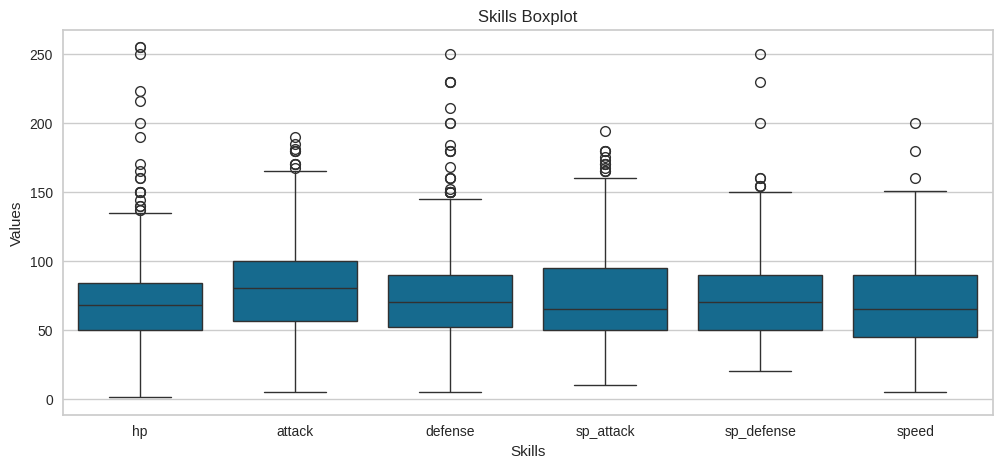

In [33]:
boxplot = pd.melt(df,
                       id_vars = ["type1", "type2", "generation", "legendary"],
                       value_vars = ["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"])
plt.figure(figsize=(12,5))
ax = sns.boxplot(x="variable", y="value", data=boxplot)
plt.title("Skills Boxplot")
plt.xlabel("Skills")
plt.ylabel("Values");

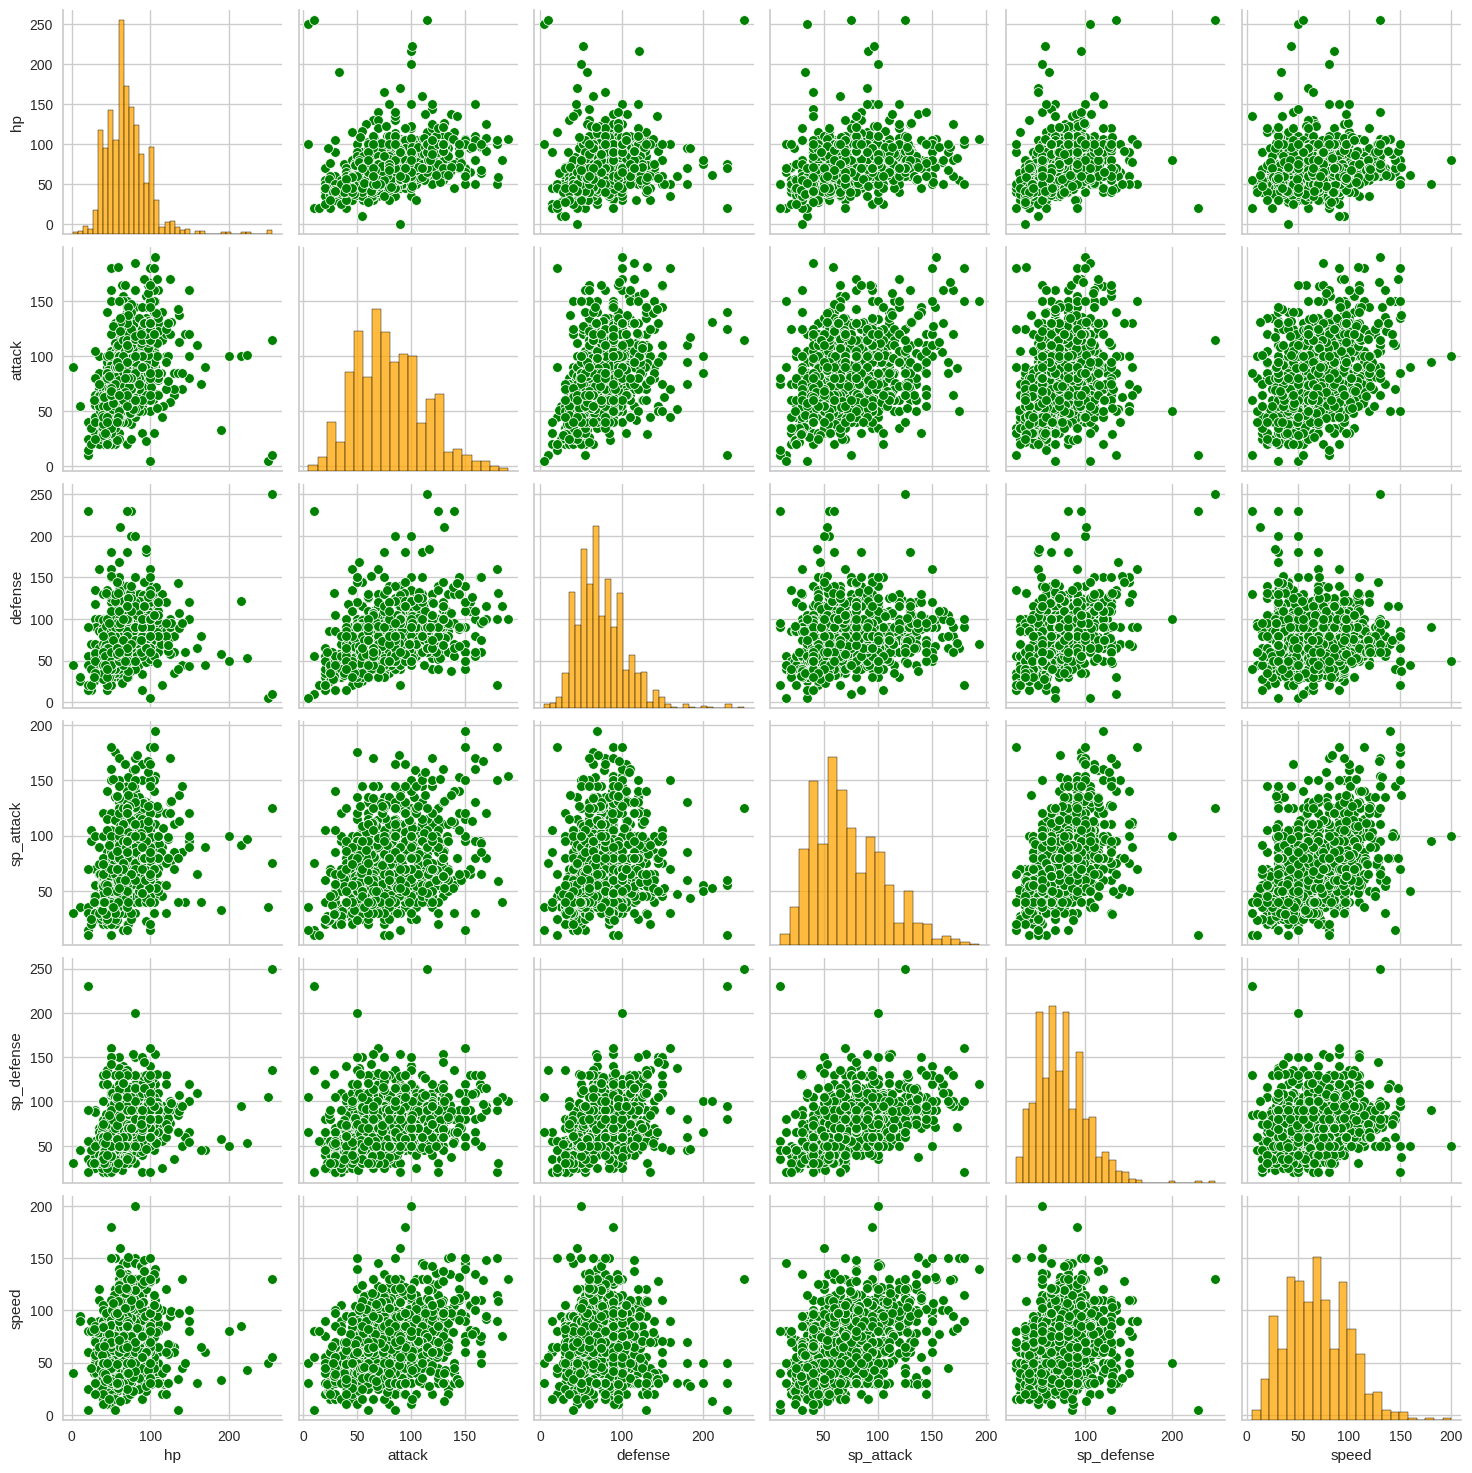

In [34]:
sns.pairplot(df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed"]], plot_kws = {'color': 'green'}, diag_kws = {'color': 'orange'});

In [35]:
#Como se mencionó anteriormente, eliminamos variables type1 y type2

df_1 = df.drop(columns=['type1','type2'])

In [37]:
df_1.describe()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


In [39]:
# Normalizamos los datos para que la distinta escala de las variables no nos sesgué nuestro modelo.

scaler = StandardScaler()
scaled_df_1 = pd.DataFrame(scaler.fit_transform(df_1), columns=df_1.columns)

In [40]:
# Revisamos la varianza de cada variable, es 1, lo que confirma que ya los datos están normalizados.

scaled_df_1.var().round(2)

,0
total,1.0
hp,1.0
attack,1.0
defense,1.0
sp_attack,1.0
sp_defense,1.0
speed,1.0
generation,1.0
legendary,1.0


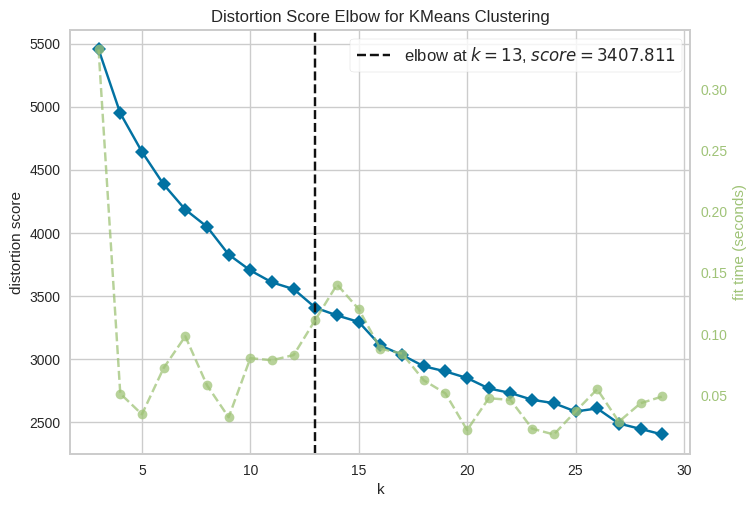

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Aplicamos el método del codo para ver cual es el número recomendado de clústers.

model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(3,30))
visualizer.fit(scaled_df_1)
visualizer.show()

In [42]:
# El método del codo no da claridad de que cierto número de segmento sea óptimo, probaré eliminando la variable total.

df_2 = df.drop(columns=['total', 'type1','type2'])

In [43]:
scaler = StandardScaler()
scaled_df_2 = pd.DataFrame(scaler.fit_transform(df_2), columns=df_2.columns)

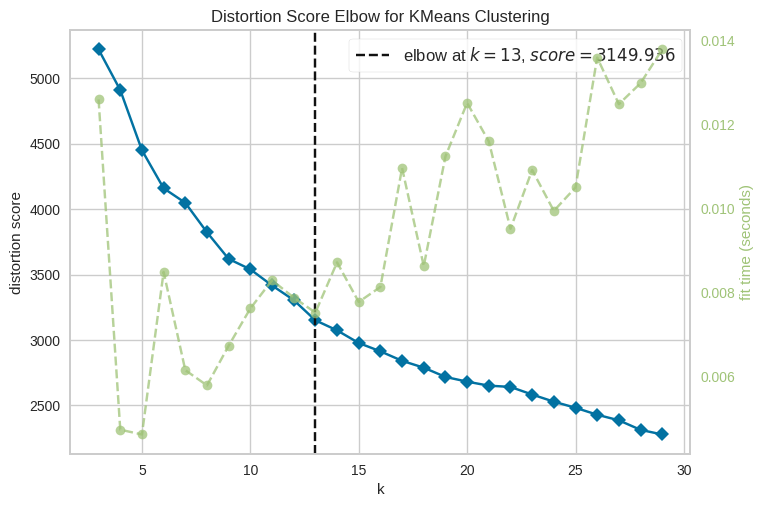

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(3,30))
visualizer.fit(scaled_df_2)
visualizer.show()

No vemos un notable cambio de inclinación en la curva para poder aplicar bien la regla del "codo".

Vamos a aplicar PCA a ver si podemos quitar información irrelevante y ver si el algortimo es capaz de agrupar mejor nuestros registros.





In [45]:
pca = PCA(random_state = 42)
pca.fit(scaled_df_2)

PCA(random_state=42)

In [46]:
scaled_df_2.head()

,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,-0.949040,-0.984283,-0.832490,-0.253566,-0.267778,-0.791455,-1.404796,-0.351696
1,-0.390495,-0.583647,-0.383679,0.206163,0.269448,-0.292490,-1.404796,-0.351696
2,0.354231,0.032716,0.257480,0.819136,0.985749,0.372796,-1.404796,-0.351696
3,0.354231,0.587442,1.539799,1.493406,1.702050,0.372796,-1.404796,-0.351696
4,0.354231,0.032716,0.257480,0.819136,0.985749,0.372796,-1.404796,-0.351696


explained_variance_ratio_ Nos devuelve el porcentaje de varianza explicada por cada uno de los componentes seleccionados. Si no se establece la variable de n_components, todos los componentes se almacenan y la suma de las proporciones es igual a 1.

In [47]:
pca.explained_variance_ratio_.round(3)

array([0.384, 0.142, 0.125, 0.1  , 0.084, 0.079, 0.054, 0.032])

In [ ]:
0.384 + 0.142 + 0.125 + 0.1 + 0.084 + 0.079

0.9139999999999999

Para decidir al número de variables que queremos reducir nuestra información inicial, podemos hacer pruebas con las diferentes variables de las cuales disponemos y del número al que queremos reducirlas.

In [48]:
scaled_df_2.columns.to_list()

['hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'generation',
 'legendary']

In [49]:
features = scaled_df_2.columns

pca = PCA()
components = pca.fit_transform(scaled_df_2[features])

df

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...
Glastrier,Ice,NoType,580,100,145,130,65,110,30,8,True
Spectrier,Ghost,NoType,580,100,65,60,145,80,130,8,True
Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True


In [50]:
pca_4= PCA(6, random_state=42)
df_transformed = pca_4.fit_transform(scaled_df_2)

In [51]:
df_transformed = pd.DataFrame(df_transformed, columns=[['PC1','PC2','PC3','PC4', 'PC5', 'PC6']])

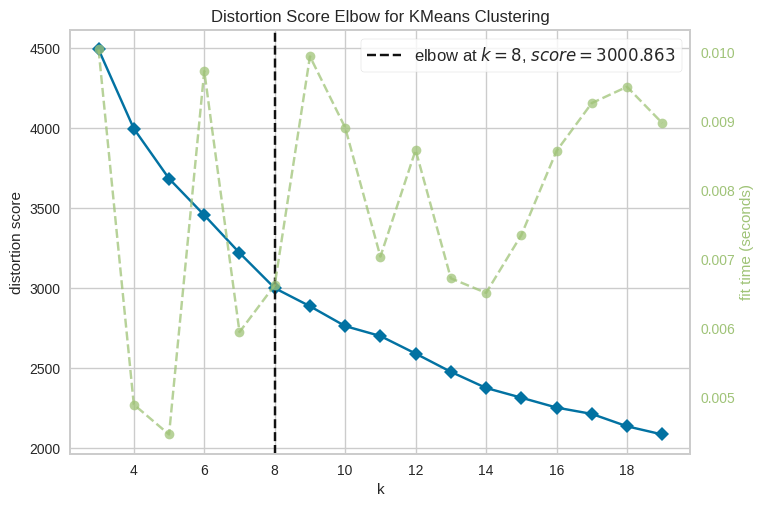

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(3,20))
visualizer.fit(df_transformed)
visualizer.show()

Observamos que con la informacion comprimida conseguimos una separación de 8 clusters. Por lo tanto, nos quedamos con 8 clusters es decir k=8.

A continuación vamos a analizar los clusters para ver como podemos caracterizarlos.

## 5.4. Aplicamos el algoritmo: K-Means

In [ ]:
K=8

In [ ]:
kmeans = KMeans(random_state = 42, n_clusters=K).fit(df_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_labels = kmeans.predict(df_transformed)
df['cluster_id'] = cluster_labels

In [ ]:
df['cluster_id'].value_counts()

cluster_id
1    186
4    179
7    159
0    153
2    125
3    114
5    104
6     52
Name: count, dtype: int64

In [ ]:
df['cluster_id'].value_counts(normalize = True)

cluster_id
1    0.173507
4    0.166978
7    0.148321
0    0.142724
2    0.116604
3    0.106343
5    0.097015
6    0.048507
Name: proportion, dtype: float64

In [ ]:
df.head()

,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary,cluster_id
name,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,7
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,7
Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,7


## 5.5. Descripción de los clusters obtenidos

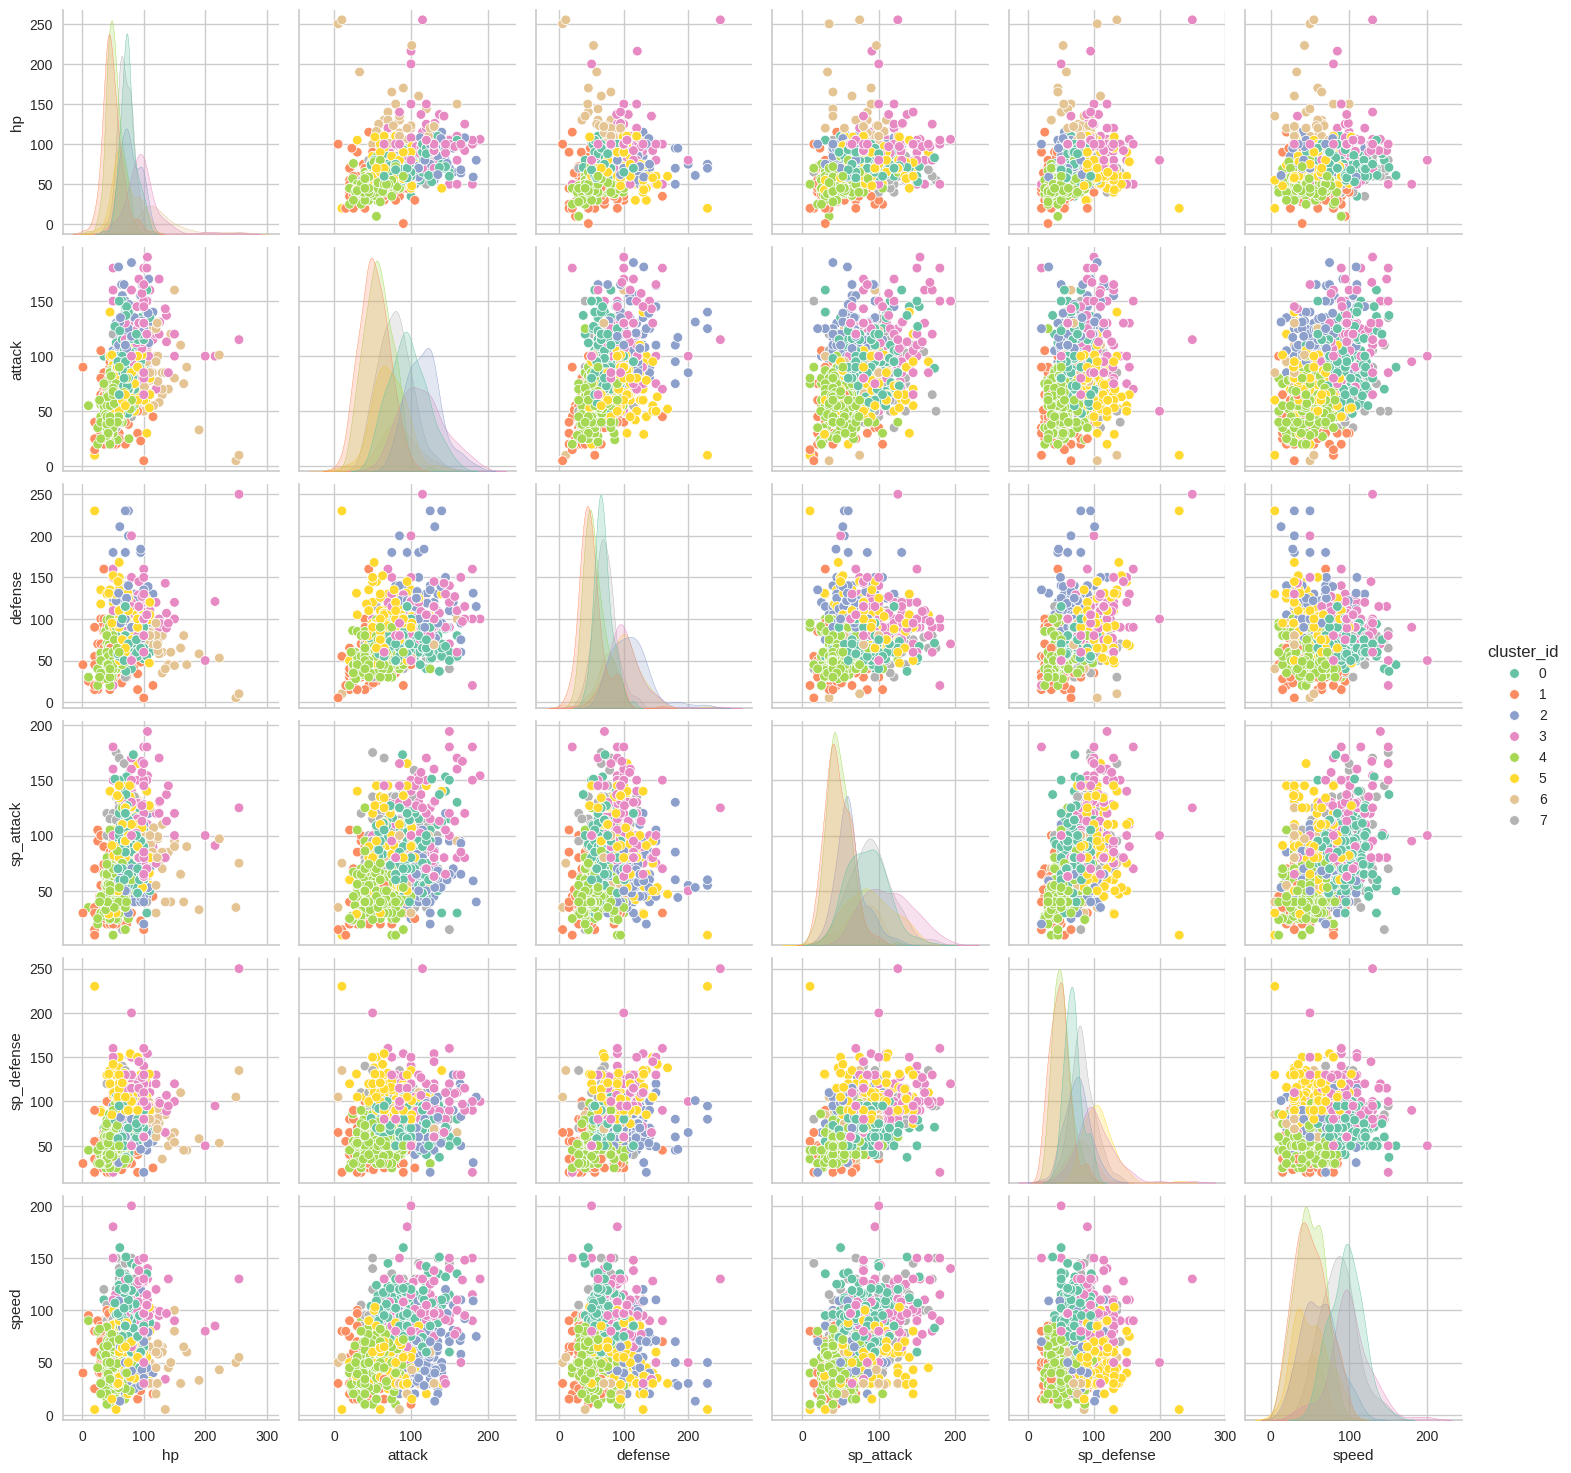

In [ ]:
sns.pairplot(df[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "cluster_id"]], hue = 'cluster_id', palette = sns.color_palette("Set2"))

In [ ]:
df.columns.to_list()

['type1',
 'type2',
 'total',
 'hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'generation',
 'legendary',
 'cluster_id']

In [ ]:
df_mean= round(df[['total','hp','attack','defense','sp_attack','sp_defense','speed','generation','legendary','cluster_id']].groupby('cluster_id').mean(),1)

df_mean.insert(0,'num. pokemons',df.groupby('cluster_id').cluster_id.count())
df_mean.insert(1,'% pokemons sb. total',100*df.groupby('cluster_id').cluster_id.count()/df.shape[0])

df_mean = df_mean.T
df_mean.style.format("{:20,.2f}").background_gradient(axis=1, cmap='Blues')

cluster_id,0,1,2,3,4,5,6,7
num. pokemons,153.00,186.00,125.00,114.00,179.00,104.00,52.00,159.00
% pokemons sb. total,14.27,17.35,11.66,10.63,16.70,9.70,4.85,14.83
total,488.30,295.70,506.50,629.20,311.90,489.70,483.40,477.90
hp,74.60,48.40,78.60,97.80,51.90,69.10,126.80,69.80
attack,96.30,52.10,116.80,114.70,57.50,72.00,82.70,79.10
defense,68.00,49.80,111.40,100.90,54.90,101.70,70.00,70.70
sp_attack,85.00,47.20,62.90,112.90,47.80,88.80,77.10,89.60
sp_defense,68.10,47.40,74.60,102.50,50.60,107.10,79.30,82.60
speed,96.30,51.00,62.20,100.60,49.20,51.30,47.50,86.10
generation,6.10,2.20,3.90,4.90,6.10,5.80,3.80,1.90


CLUSTER 0: **POKEMONS MUY RÁPIDOS DE GENERACIONES MODERNAS**

CLUSTER 1: **POKEMONS MÁS DÉBILES**

CLUSTER 2: **POKEMONS CON MUCHO ATAQUE Y DEFENSA**

CLUSTER 3: **POKEMONS LEGENDARIOS Y CON ALTAS CAPACIDADES**

CLUSTER 4: **POKEMONS DE GENERACIONES MODERNAS Y CON BAJAS CAPACIDADES**

CLUSTER 5: **POKEMONS CON UNA DEFENSA ESPECIAL MUY ELEVADA**

CLUSTER 6: **POKEMONS TANQUE**

CLUSTER 7: **POKEMONS DE PRIMERAS GENERACIONES**